#  Plot longcore HU images

## Load dependencies

In [1]:
import os
from glob import glob
from joblib import dump, load
import numpy as np
import pandas as pd
from scipy.stats import norm, skew, kurtosis
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
%matplotlib inline

## Define function to plot longcore HU images 

In [2]:
def plot_average_HU(core_slices,
                    depths,
                    color_map = 'gist_rainbow_r',
                    vmin = 725,vmax = 1450,
                    aspect = 1,
                    y_label_interval = 500,
                    y_resolution = 0.6,
                    size = [10,20]):
    # define figure
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=size)
    im = ax.imshow(core_slices.mean(axis = 1), cmap = 'gist_rainbow_r', vmin = vmin,vmax = vmax, aspect = aspect)
    # set x and y ticks
    ax.set_xticks([])
    y_label_pos = depths[depths%y_label_interval <= y_resolution].index.tolist()
    y_label_val = [round(i) for i in depths[y_label_pos]]
    ax.set_yticks(y_label_pos)
    ax.set_yticklabels(y_label_val)
    ax.set_ylabel('Depth [mm]')
    # set colorbar
    cbar = fig.colorbar(im,orientation="horizontal", pad=0.02, shrink = 0.4, anchor = (1.0,0.5))
    cbar.set_label('HU values', labelpad = -40)
    return(fig)

## Load slices and data tables

In [3]:
data_dir = '../CT_data_Vandorpe/preproc'
model_dir = 'script_ouput/EM_models'
data_table_dir = 'script_ouput/data_tables'
label_data_dir = '../CT_data_Vandorpe/labelled_data'
fig_dir = 'figures/hu_images'

In [4]:
cores = os.listdir(data_dir)
# store data per core in a dictionnary
slices = {}
data_table = {}
for core in cores:
    slice_files = glob(data_dir +'/'+ core+'/*_slices.npy')
    slices[core] = np.concatenate([np.load(f) for f in slice_files])
    data_table[core] = pd.read_csv(data_table_dir+'/'+core+'.csv',index_col = 0)

## Generate HU images

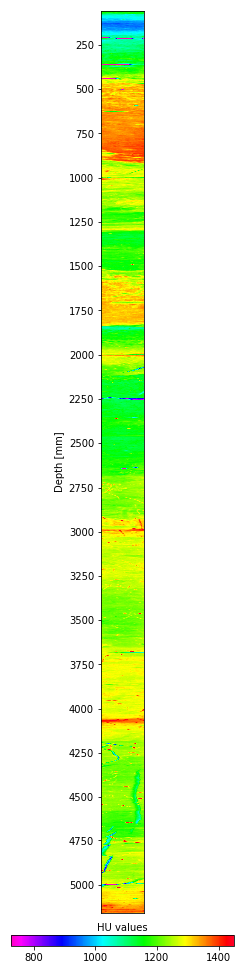

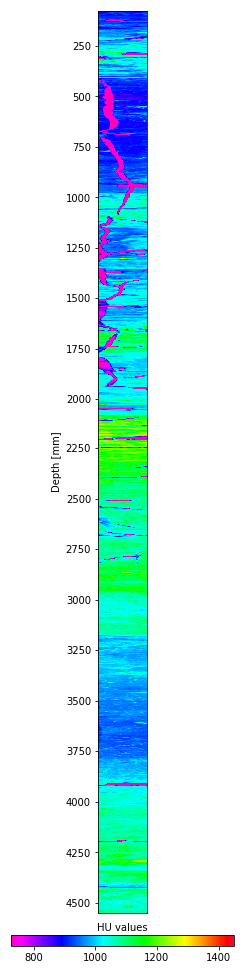

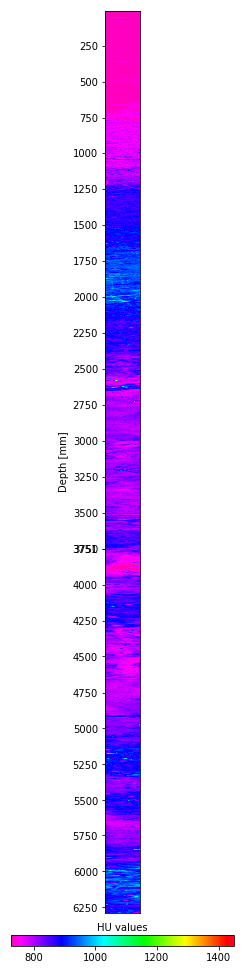

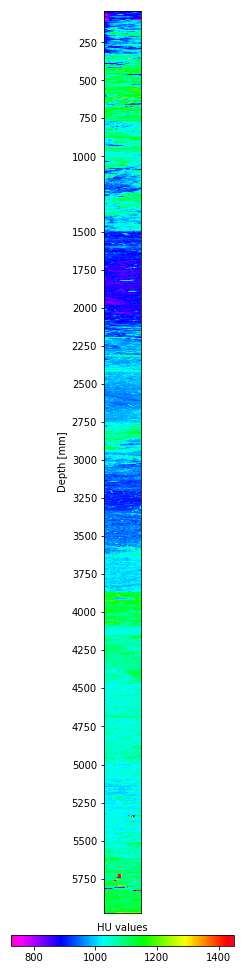

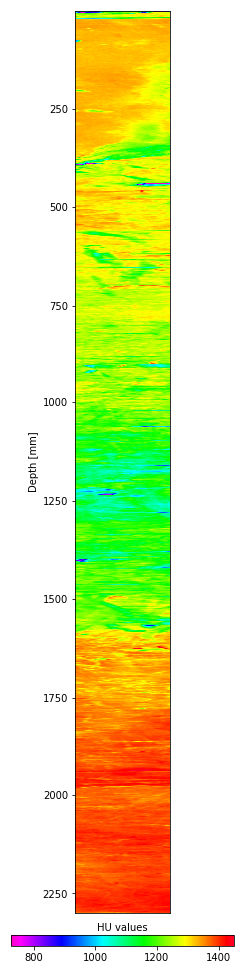

In [5]:
for core in cores:
    fig = plot_average_HU(core_slices = slices[core],depths = data_table[core].Depth_mm, y_label_interval=250,aspect = 0.5)
    fig.savefig(fig_dir+'/'+core+'.eps',format = 'eps', dpi = 1000, bbox_inches = "tight")